In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
data = pd.read_csv('full_merged_data.csv')

# Mostrar las primeras filas del DataFrame para verificar la carga
data.head()

,DATE,TRDPRC_1,HIGH_1,LOW_1,OPEN_PRC,BID,ASK,TRNOVR_UNS,NUM_MOVES,RIC,...,Year,Company Name,Environmental Pillar Score,Governance Pillar Score,Cluster,FY,ESG Combined Score,ESG Controversies Score,ESG Score,Social Pillar Score
0,2015-01-02,40.56,41.31,40.38,41.18,40.56,40.57,1.469962e+07,1701.0,A,...,2015,Agilent Technologies Inc,71.705539,68.513544,1.0,FY-7,78.094941,100.0,78.094941,87.636549
1,2015-01-05,39.80,40.46,39.70,40.32,39.78,39.80,2.073307e+07,2024.0,A,...,2015,Agilent Technologies Inc,71.705539,68.513544,1.0,FY-7,78.094941,100.0,78.094941,87.636549
2,2015-01-06,39.18,40.00,39.02,39.81,39.16,39.18,2.642439e+07,2082.0,A,...,2015,Agilent Technologies Inc,71.705539,68.513544,1.0,FY-7,78.094941,100.0,78.094941,87.636549
3,2015-01-07,39.70,39.81,39.31,39.52,39.69,39.70,2.565600e+07,2955.0,A,...,2015,Agilent Technologies Inc,71.705539,68.513544,1.0,FY-7,78.094941,100.0,78.094941,87.636549
4,2015-01-08,40.89,40.97,40.18,40.28,40.88,40.89,2.436219e+07,2563.0,A,...,2015,Agilent Technologies Inc,71.705539,68.513544,1.0,FY-7,78.094941,100.0,78.094941,87.636549


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [19]:
data.dropna(inplace=True)  

In [20]:
X = data.select_dtypes(include=[np.number]).drop(columns=['Return']).values
y = data['Return'].values

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [23]:
dataset = TensorDataset(X_tensor, y_tensor)

In [24]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

In [25]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [26]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.layers(x)
    

# Instanciar el modelo
input_size = X.shape[1]  # Número de características
hidden_size = 100        # Puedes ajustar este tamaño
output_size = 1          # Predecir un valor continuo

model = MLP(input_size, hidden_size, output_size)

# Definir el criterio y el optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [27]:
# Definir el número de épocas
epochs = 50

for epoch in range(epochs):
    model.train()  # Poner el modelo en modo entrenamiento
    running_loss = 0.0
    for inputs, targets in train_loader:
        # Limpiar los gradientes
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        
        # Backward y optimizar
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/50], Loss: 0.0006
Epoch [2/50], Loss: 0.0004
Epoch [3/50], Loss: 0.0004
Epoch [4/50], Loss: 0.0004
Epoch [5/50], Loss: 0.0004
Epoch [6/50], Loss: 0.0003
Epoch [7/50], Loss: 0.0003
Epoch [8/50], Loss: 0.0003
Epoch [9/50], Loss: 0.0002
Epoch [10/50], Loss: 0.0002
Epoch [11/50], Loss: 0.0002
Epoch [12/50], Loss: 0.0002
Epoch [13/50], Loss: 0.0002
Epoch [14/50], Loss: 0.0002
Epoch [15/50], Loss: 0.0002
Epoch [16/50], Loss: 0.0002
Epoch [17/50], Loss: 0.0002
Epoch [18/50], Loss: 0.0002
Epoch [19/50], Loss: 0.0002
Epoch [20/50], Loss: 0.0002
Epoch [21/50], Loss: 0.0002
Epoch [22/50], Loss: 0.0002
Epoch [23/50], Loss: 0.0002
Epoch [24/50], Loss: 0.0002
Epoch [25/50], Loss: 0.0002
Epoch [26/50], Loss: 0.0002
Epoch [27/50], Loss: 0.0002
Epoch [28/50], Loss: 0.0002
Epoch [29/50], Loss: 0.0002
Epoch [30/50], Loss: 0.0002
Epoch [31/50], Loss: 0.0002
Epoch [32/50], Loss: 0.0002
Epoch [33/50], Loss: 0.0002
Epoch [34/50], Loss: 0.0002
Epoch [35/50], Loss: 0.0002
Epoch [36/50], Loss: 0.0002
E

In [28]:
model.eval()  # Poner el modelo en modo evaluación
with torch.no_grad():  # Desactivar la calculación de gradientes
    test_loss = 0.0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        test_loss += loss.item() * inputs.size(0)
    test_loss /= len(test_loader.dataset)
    print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.0003


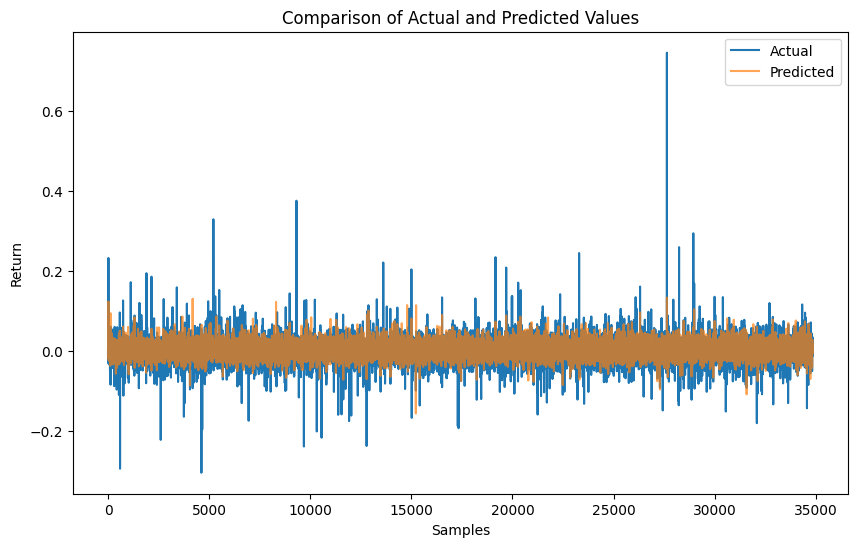

In [29]:
import matplotlib.pyplot as plt

predictions, actuals = [], []
model.eval()
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.extend(outputs.view(-1).tolist())
        actuals.extend(targets.tolist())

# Graficar predicciones contra valores reales
plt.figure(figsize=(10, 6))
plt.plot(actuals, label='Actual')
plt.plot(predictions, label='Predicted', alpha=0.7)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Return')
plt.legend()
plt.show()

In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

predictions, actuals = [], []
model.eval()
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.extend(outputs.view(-1).tolist())
        actuals.extend(targets.tolist())

predictions = np.array(predictions)
actuals = np.array(actuals)

In [31]:
# Calcular el Mean Squared Error
mse = mean_squared_error(actuals, predictions)
print(f'Mean Squared Error: {mse:.4f}')

# Calcular el R^2 Score
r2 = r2_score(actuals, predictions)
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error: 0.0003
R^2 Score: 0.3062


---

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
# Modificación de la arquitectura MLP para incluir Dropout y capas adicionales
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.5),  # Añadiendo Dropout para regularización
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Dropout(0.5),  # Añadiendo otro Dropout
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1)  # Salida para regresión
        )

    def forward(self, x):
        return self.network(x)

In [46]:
# Reinstancia el modelo con la nueva arquitectura
model = MLP(input_size)

# Reconfigura el optimizador si es necesario
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [47]:
# Ajustando la tasa de aprendizaje y el tamaño del lote
optimizer = optim.Adam(model.parameters(), lr=0.0005)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/100], Loss: 0.0007
Epoch [2/100], Loss: 0.0004
Epoch [3/100], Loss: 0.0004
Epoch [4/100], Loss: 0.0004
Epoch [5/100], Loss: 0.0004
Epoch [6/100], Loss: 0.0004
Epoch [7/100], Loss: 0.0004
Epoch [8/100], Loss: 0.0004
Epoch [9/100], Loss: 0.0004
Epoch [10/100], Loss: 0.0004
Epoch [11/100], Loss: 0.0004
Epoch [12/100], Loss: 0.0004
Epoch [13/100], Loss: 0.0004
Epoch [14/100], Loss: 0.0004
Epoch [15/100], Loss: 0.0004
Epoch [16/100], Loss: 0.0004
Epoch [17/100], Loss: 0.0004
Epoch [18/100], Loss: 0.0004
Epoch [19/100], Loss: 0.0004
Epoch [20/100], Loss: 0.0004
Epoch [21/100], Loss: 0.0004
Epoch [22/100], Loss: 0.0004
Epoch [23/100], Loss: 0.0004
Epoch [24/100], Loss: 0.0004
Epoch [25/100], Loss: 0.0004
Epoch [26/100], Loss: 0.0004
Epoch [27/100], Loss: 0.0004
Epoch [28/100], Loss: 0.0004
Epoch [29/100], Loss: 0.0004
Epoch [30/100], Loss: 0.0004
Epoch [31/100], Loss: 0.0004
Epoch [32/100], Loss: 0.0004
Epoch [33/100], Loss: 0.0004
Epoch [34/100], Loss: 0.0004
Epoch [35/100], Loss: 0

In [41]:
# Entrenamiento del modelo con la nueva arquitectura
epochs = 100  # Incrementa el número de épocas
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}')

NotImplementedError: Module [MLP] is missing the required "forward" function

In [51]:
# Evaluación del modelo
model.eval()
test_loss = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        test_loss += loss.item()
    print(f'Test Loss: {test_loss/len(test_loader)}')


Test Loss: 0.00023427039312482855


In [53]:
# Cálculo de MSE y R^2 para la evaluación final
predictions, actuals = [], []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predictions.extend(outputs.view(-1).tolist())
        actuals.extend(targets.tolist())

mse = mean_squared_error(actuals, predictions)
r2 = r2_score(actuals, predictions)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error: 0.0002
R^2 Score: 0.4260


___

In [50]:
# Definiendo un modelo más profundo
class DeepMLP(nn.Module):
    def __init__(self, input_size):
        super(DeepMLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

deep_model = DeepMLP(input_size)
optimizer = optim.Adam(deep_model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Entrenamiento del modelo más profundo
for epoch in range(epochs):
    deep_model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = deep_model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/100], Loss: 0.0004
Epoch [2/100], Loss: 0.0004
Epoch [3/100], Loss: 0.0004
Epoch [4/100], Loss: 0.0004
Epoch [5/100], Loss: 0.0004
Epoch [6/100], Loss: 0.0004
Epoch [7/100], Loss: 0.0004
Epoch [8/100], Loss: 0.0003
Epoch [9/100], Loss: 0.0003
Epoch [10/100], Loss: 0.0003
Epoch [11/100], Loss: 0.0003
Epoch [12/100], Loss: 0.0002
Epoch [13/100], Loss: 0.0002
Epoch [14/100], Loss: 0.0002
Epoch [15/100], Loss: 0.0002
Epoch [16/100], Loss: 0.0002
Epoch [17/100], Loss: 0.0002
Epoch [18/100], Loss: 0.0002
Epoch [19/100], Loss: 0.0002
Epoch [20/100], Loss: 0.0002
Epoch [21/100], Loss: 0.0002
Epoch [22/100], Loss: 0.0002
Epoch [23/100], Loss: 0.0002
Epoch [24/100], Loss: 0.0002
Epoch [25/100], Loss: 0.0002
Epoch [26/100], Loss: 0.0002
Epoch [27/100], Loss: 0.0002
Epoch [28/100], Loss: 0.0002
Epoch [29/100], Loss: 0.0002
Epoch [30/100], Loss: 0.0002
Epoch [31/100], Loss: 0.0002
Epoch [32/100], Loss: 0.0002
Epoch [33/100], Loss: 0.0002
Epoch [34/100], Loss: 0.0002
Epoch [35/100], Loss: 0

In [54]:
# Poner el modelo en modo evaluación
deep_model.eval()

DeepMLP(
  (network): Sequential(
    (0): Linear(in_features=17, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [55]:
# Inicializar listas para guardar las predicciones y los valores reales
predictions, actuals = [], []

# No calcular gradientes para las siguientes operaciones
with torch.no_grad():
    test_loss = 0.0
    for inputs, targets in test_loader:
        outputs = deep_model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        test_loss += loss.item() * inputs.size(0)
        
        # Guardar las predicciones y los valores actuales
        predictions.extend(outputs.view(-1).tolist())
        actuals.extend(targets.tolist())

    test_loss /= len(test_loader.dataset)
    print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.0002


In [56]:
# Convertir listas a arrays para cálculos
predictions = np.array(predictions)
actuals = np.array(actuals)

# Calcular el Mean Squared Error
mse = mean_squared_error(actuals, predictions)
print(f'Mean Squared Error: {mse:.4f}')

# Calcular el R^2 Score
r2 = r2_score(actuals, predictions)
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error: 0.0002
R^2 Score: 0.5090


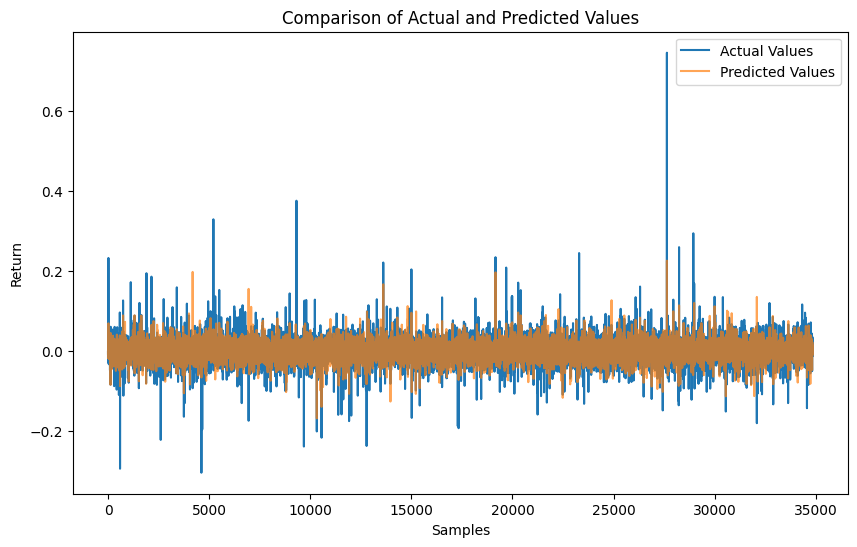

In [57]:
# Graficar predicciones contra valores reales
plt.figure(figsize=(10, 6))
plt.plot(actuals, label='Actual Values')
plt.plot(predictions, label='Predicted Values', alpha=0.7)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Return')
plt.legend()
plt.show()

## Validar sin ESG

In [75]:
# Eliminar columnas ESG
columns_to_drop = ['Environmental Pillar Score', 'Governance Pillar Score', 'Social Pillar Score', 'ESG Score', 'ESG Combined Score', 'ESG Controversies Score']
data = data.drop(columns=columns_to_drop)

In [76]:
# Preparar los datos
data.dropna(inplace=True)
X = data.select_dtypes(include=[np.number]).drop(columns=['Return']).values
y = data['Return'].values

In [77]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [78]:
# Convertir a tensores
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [79]:
# Crear datasets y dataloaders
dataset = TensorDataset(X_tensor, y_tensor)
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [80]:
# Definir el modelo
class DeepMLP(nn.Module):
    def __init__(self, input_size):
        super(DeepMLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

# Instanciar el modelo
input_size = X.shape[1]
deep_model = DeepMLP(input_size)

# Configurar optimizador y criterio
optimizer = optim.Adam(deep_model.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [81]:
# Entrenar el modelo
epochs = 100
for epoch in range(epochs):
    deep_model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = deep_model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/100], Loss: 0.0004
Epoch [2/100], Loss: 0.0004
Epoch [3/100], Loss: 0.0004
Epoch [4/100], Loss: 0.0003
Epoch [5/100], Loss: 0.0003
Epoch [6/100], Loss: 0.0002
Epoch [7/100], Loss: 0.0002
Epoch [8/100], Loss: 0.0002
Epoch [9/100], Loss: 0.0002
Epoch [10/100], Loss: 0.0002
Epoch [11/100], Loss: 0.0002
Epoch [12/100], Loss: 0.0002
Epoch [13/100], Loss: 0.0002
Epoch [14/100], Loss: 0.0002
Epoch [15/100], Loss: 0.0002
Epoch [16/100], Loss: 0.0002
Epoch [17/100], Loss: 0.0002
Epoch [18/100], Loss: 0.0002
Epoch [19/100], Loss: 0.0002
Epoch [20/100], Loss: 0.0002
Epoch [21/100], Loss: 0.0002
Epoch [22/100], Loss: 0.0002
Epoch [23/100], Loss: 0.0002
Epoch [24/100], Loss: 0.0002
Epoch [25/100], Loss: 0.0002
Epoch [26/100], Loss: 0.0002
Epoch [27/100], Loss: 0.0002
Epoch [28/100], Loss: 0.0002
Epoch [29/100], Loss: 0.0002
Epoch [30/100], Loss: 0.0002
Epoch [31/100], Loss: 0.0002
Epoch [32/100], Loss: 0.0002
Epoch [33/100], Loss: 0.0002
Epoch [34/100], Loss: 0.0002
Epoch [35/100], Loss: 0

In [82]:
# Evaluar el modelo
deep_model.eval()
with torch.no_grad():
    predictions, actuals = [], []
    for inputs, targets in test_loader:
        outputs = deep_model(inputs)
        predictions.extend(outputs.view(-1).tolist())
        actuals.extend(targets.tolist())

    # Calcular métricas de desempeño
    mse = mean_squared_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'R^2 Score: {r2:.4f}')

Mean Squared Error: 0.0002
R^2 Score: 0.5437


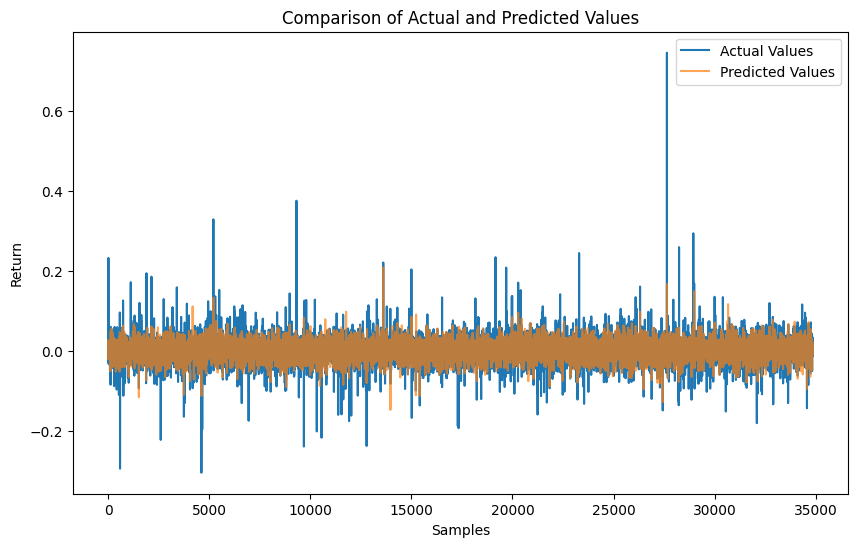

In [83]:
# Graficar predicciones contra valores reales
plt.figure(figsize=(10, 6))
plt.plot(actuals, label='Actual Values')
plt.plot(predictions, label='Predicted Values', alpha=0.7)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Return')
plt.legend()
plt.show()

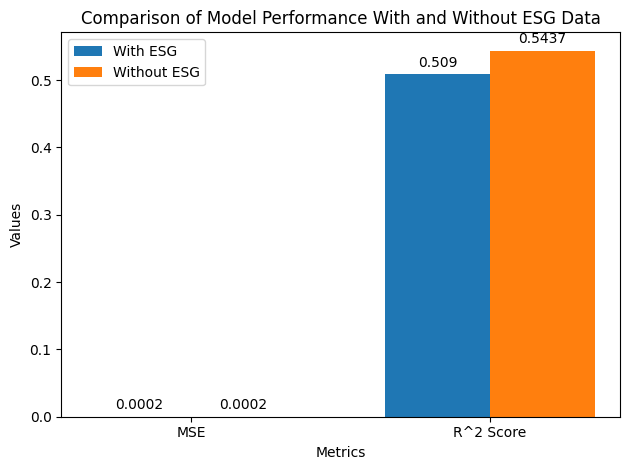

In [84]:
import matplotlib.pyplot as plt

# Supongamos que estos son los resultados obtenidos de tus modelos
mse_with_esg = 0.0002  # Asumiendo que este fue el resultado MSE con datos ESG
r2_with_esg = 0.5090   # Asumiendo que este fue el resultado R^2 con datos ESG

mse_without_esg = 0.0002  # Resultados del modelo sin datos ESG
r2_without_esg = 0.5437   # Resultados del modelo sin datos ESG

# Datos para el gráfico
metrics = ['MSE', 'R^2 Score']
with_esg = [mse_with_esg, r2_with_esg]
without_esg = [mse_without_esg, r2_without_esg]

x = np.arange(len(metrics))  # Localización de las etiquetas
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, with_esg, width, label='With ESG')
rects2 = ax.bar(x + width/2, without_esg, width, label='Without ESG')

# Añadir características al gráfico
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Performance With and Without ESG Data')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Función para añadir etiquetas de datos en las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos verticales de desplazamiento
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [85]:
# Guardar el modelo completo
torch.save(deep_model.state_dict(), 'deep_model.pth')

# Guardar el modelo para inferencia
model_scripted = torch.jit.script(deep_model)  # Convertir el modelo a TorchScript
model_scripted.save('deep_model_scripted.pth')  # Guardar el modelo TorchScript

In [86]:
# # Cargar el modelo guardado
# model = DeepMLP(input_size)  # Asegúrate de inicializar el modelo con el tamaño de entrada correcto
# model.load_state_dict(torch.load('deep_model.pth'))
# model.eval()  # Poner el modelo en modo evaluación

# # Cargar el modelo TorchScript
# model_scripted = torch.jit.load('deep_model_scripted.pth')
# model_scripted.eval()  # Poner el modelo TorchScript en modo evaluación

In [87]:
from torchsummary import summary

# Asumiendo que 'deep_model' es tu modelo y está definido con la dimensión de entrada correcta
summary(deep_model, input_size=(input_size,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]           3,072
              ReLU-2                  [-1, 256]               0
            Linear-3                  [-1, 256]          65,792
              ReLU-4                  [-1, 256]               0
            Linear-5                  [-1, 128]          32,896
              ReLU-6                  [-1, 128]               0
            Linear-7                   [-1, 64]           8,256
              ReLU-8                   [-1, 64]               0
            Linear-9                    [-1, 1]              65
Total params: 110,081
Trainable params: 110,081
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.42
Estimated Total Size (MB): 0.43
-------------------------------------------

In [90]:
from torchviz import make_dot

# Generar un tensor de entrada dummy que coincida con el tamaño de entrada del modelo
dummy_input = torch.randn(1, input_size)

# Usar el modelo para obtener la salida
output = deep_model(dummy_input)

# Crear el gráfico
dot = make_dot(output, params=dict(list(deep_model.named_parameters()) + [('input', dummy_input)]))
dot.render("model_architecture", format="png")  # Guarda el gráfico en un archivo PNG

'model_architecture.png'

___

In [68]:
# Definir la arquitectura del modelo
class EnhancedMLP(nn.Module):
    def __init__(self):
        super(EnhancedMLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(X.shape[1], 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.network(x)

# Instanciar y configurar el modelo
enhanced_model = EnhancedMLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(enhanced_model.parameters(), lr=0.001)

In [69]:
# Entrenamiento del modelo
epochs = 100
for epoch in range(epochs):
    enhanced_model.train()
    total_loss = 0
    for batch in train_loader:
        inputs, targets = batch
        optimizer.zero_grad()
        outputs = enhanced_model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader)}')

Epoch 1/100, Loss: 0.0004961141097039511
Epoch 2/100, Loss: 0.0004019036452010996
Epoch 3/100, Loss: 0.0004016349401845168
Epoch 4/100, Loss: 0.0004013274046582793
Epoch 5/100, Loss: 0.0004016017312574379
Epoch 6/100, Loss: 0.0004016061817916731
Epoch 7/100, Loss: 0.0004013807384698772
Epoch 8/100, Loss: 0.0004015876397386166
Epoch 9/100, Loss: 0.0004014929371036733
Epoch 10/100, Loss: 0.0004015306985887457
Epoch 11/100, Loss: 0.00040125377367764177
Epoch 12/100, Loss: 0.0004015534691290444
Epoch 13/100, Loss: 0.0004013942232312929
Epoch 14/100, Loss: 0.0004014519941877604
Epoch 15/100, Loss: 0.0004013528635747187
Epoch 16/100, Loss: 0.0004016068931117387
Epoch 17/100, Loss: 0.0004016333681901556
Epoch 18/100, Loss: 0.00040144768686094077
Epoch 19/100, Loss: 0.0004012570755325961
Epoch 20/100, Loss: 0.0004013868375664023
Epoch 21/100, Loss: 0.0004014091215996949
Epoch 22/100, Loss: 0.0004013089890959754
Epoch 23/100, Loss: 0.0004013566930000726
Epoch 24/100, Loss: 0.0004013223697624235

In [73]:
# Evaluación del modelo
enhanced_model.eval()
test_loss = 0
predictions = []
actuals = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = enhanced_model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        test_loss += loss.item()
        predictions.extend(outputs.view(-1).tolist())
        actuals.extend(targets.tolist())

test_loss /= len(test_loader)
predictions = np.array(predictions)
actuals = np.array(actuals)
mse = mean_squared_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

# Resultados
print(f'Test MSE: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

Test MSE: 0.0004
R^2 Score: -0.0076


In [66]:
# Convertir listas a arrays de numpy para cálculo de métricas
predictions = np.array(predictions)
actuals = np.array(actuals)

# Calcular el Mean Squared Error
mse = mean_squared_error(actuals, predictions)
print(f'Mean Squared Error: {mse:.4f}')

# Calcular el R^2 Score
r2 = r2_score(actuals, predictions)
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error: 0.0003
R^2 Score: 0.1794


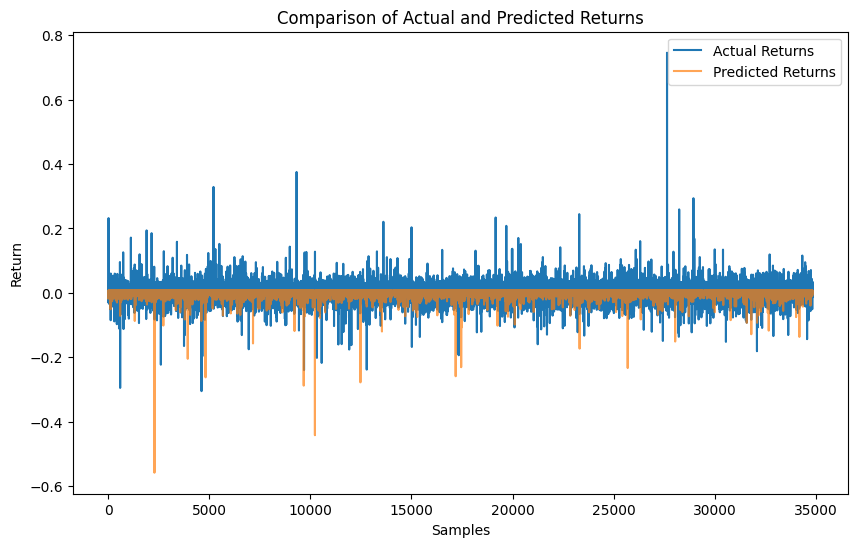

In [67]:
# Visualización de predicciones contra valores reales
plt.figure(figsize=(10, 6))
plt.plot(actuals, label='Actual Returns')
plt.plot(predictions, label='Predicted Returns', alpha=0.7)
plt.title('Comparison of Actual and Predicted Returns')
plt.xlabel('Samples')
plt.ylabel('Return')
plt.legend()
plt.show()

# Return Mensili

In [2]:
# Cargar el dataset full_merged_data.csv
data = pd.read_csv('full_merged_data.csv', parse_dates=['DATE'])

In [3]:
data.columns

Index(['DATE', 'TRDPRC_1', 'HIGH_1', 'LOW_1', 'OPEN_PRC', 'BID', 'ASK',
       'TRNOVR_UNS', 'NUM_MOVES', 'RIC', 'Return', 'Aggregated_Articles',
       'Average_Sentiment', 'Year', 'Company Name',
       'Environmental Pillar Score', 'Governance Pillar Score', 'Cluster',
       'FY', 'ESG Combined Score', 'ESG Controversies Score', 'ESG Score',
       'Social Pillar Score'],
      dtype='object')

In [4]:
# Usar 'DATE' y 'RIC' para resamplear sin establecer 'DATE' como índice
monthly_data = data.groupby(['RIC', pd.Grouper(key='DATE', freq='M')]).agg({
    'TRDPRC_1': 'last',  # último precio del mes
    'Average_Sentiment': 'mean'  # promedio del sentimiento durante el mes
}).reset_index()

/var/folders/wm/c5dyqf8x7gggnw1381p0rf3m0000gn/T/ipykernel_34162/3254534647.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.groupby(['RIC', pd.Grouper(key='DATE', freq='M')]).agg({


In [5]:
# Renombrar las columnas según los cálculos realizados
monthly_data.rename(columns={'TRDPRC_1': 'Monthly_Price'}, inplace=True)

In [6]:
monthly_data['Monthly_Returns'] = monthly_data.groupby('RIC')['Monthly_Price'].pct_change()

/var/folders/wm/c5dyqf8x7gggnw1381p0rf3m0000gn/T/ipykernel_34162/3177961815.py:1: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_data['Monthly_Returns'] = monthly_data.groupby('RIC')['Monthly_Price'].pct_change()


In [7]:
monthly_data.shape

(28849, 5)

In [8]:
monthly_data.head()

,RIC,DATE,Monthly_Price,Average_Sentiment,Monthly_Returns
0,A,2015-01-31,37.77,0.081075,NaN
1,A,2015-02-28,42.21,0.132044,0.117554
2,A,2015-03-31,41.55,0.000429,-0.015636
3,A,2015-04-30,41.37,0.124904,-0.004332
4,A,2015-05-31,41.19,0.011356,-0.004351


In [9]:
data.columns

Index(['DATE', 'TRDPRC_1', 'HIGH_1', 'LOW_1', 'OPEN_PRC', 'BID', 'ASK',
       'TRNOVR_UNS', 'NUM_MOVES', 'RIC', 'Return', 'Aggregated_Articles',
       'Average_Sentiment', 'Year', 'Company Name',
       'Environmental Pillar Score', 'Governance Pillar Score', 'Cluster',
       'FY', 'ESG Combined Score', 'ESG Controversies Score', 'ESG Score',
       'Social Pillar Score'],
      dtype='object')

In [10]:
monthly_data.columns

Index(['RIC', 'DATE', 'Monthly_Price', 'Average_Sentiment', 'Monthly_Returns'], dtype='object')

In [12]:
# Agrupación por 'RIC' y 'DATE' con frecuencia mensual y agregación de datos
aggregated_data = data.groupby(['RIC', pd.Grouper(key='DATE', freq='M')]).agg({
    'Company Name': 'first',
    'Cluster': 'first',
    'Environmental Pillar Score': 'first',
    'Governance Pillar Score': 'first',
    'Social Pillar Score': 'first',
    'ESG Score': 'first',
    'ESG Combined Score': 'first',
    'ESG Controversies Score': 'first',
    'HIGH_1': 'max',
    'LOW_1': 'min',
    'OPEN_PRC': 'first',
    'BID': 'last',
    'ASK': 'last',
    'TRNOVR_UNS': 'sum',
    'NUM_MOVES': 'sum',
    'Aggregated_Articles': 'sum',  # Si Aggregated_Articles es la suma de artículos en el mes
    'Average_Sentiment': 'mean'  # Promedio de sentimiento para el mes
}).reset_index()

/var/folders/wm/c5dyqf8x7gggnw1381p0rf3m0000gn/T/ipykernel_34162/1386175407.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aggregated_data = data.groupby(['RIC', pd.Grouper(key='DATE', freq='M')]).agg({


In [13]:
aggregated_data

,RIC,DATE,Company Name,Cluster,Environmental Pillar Score,Governance Pillar Score,Social Pillar Score,ESG Score,ESG Combined Score,ESG Controversies Score,HIGH_1,LOW_1,OPEN_PRC,BID,ASK,TRNOVR_UNS,NUM_MOVES,Aggregated_Articles,Average_Sentiment
0,A,2015-01-31,Agilent Technologies Inc,1.0,71.705539,68.513544,87.636549,78.094941,78.094941,100.0,41.31,37.685,41.18,37.75,37.77,5.041708e+08,52898.0,ModernGraham Quarterly Valuation Of Agilent Te...,0.081075
1,A,2015-02-28,Agilent Technologies Inc,1.0,71.705539,68.513544,87.636549,78.094941,78.094941,100.0,42.48,37.710,37.90,42.20,42.21,5.166803e+08,52983.0,Agilent reports February 17S&P 500 Stocks With...,0.132044
2,A,2015-03-31,Agilent Technologies Inc,1.0,71.705539,68.513544,87.636549,78.094941,78.094941,100.0,42.74,40.390,42.34,41.54,41.55,4.873654e+08,44289.0,UBS Initiates Coverage on Agilent Technologies...,0.000429
3,A,2015-04-30,Agilent Technologies Inc,1.0,71.705539,68.513544,87.636549,78.094941,78.094941,100.0,43.56,40.740,41.46,41.36,41.37,4.986241e+08,44393.0,Tell Me About 2008National Instruments: Innova...,0.124904
4,A,2015-05-31,Agilent Technologies Inc,1.0,71.705539,68.513544,87.636549,78.094941,78.094941,100.0,42.93,40.820,41.38,41.19,41.20,5.514555e+08,49055.0,"JDS Uniphase (JDSU) Beats on Q3 Earnings, Sale...",0.011356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28844,ZTS,2019-08-31,Zoetis Inc,2.0,54.653680,52.122836,65.361372,58.827204,58.827204,100.0,128.41,111.890,114.90,126.35,126.38,1.443411e+09,72819.0,"Comerica Bank Buys CDW Corp, Texas Instruments...",0.073671
28845,ZTS,2019-09-30,Zoetis Inc,2.0,54.653680,52.122836,65.361372,58.827204,58.827204,100.0,129.60,119.540,126.13,124.55,124.58,1.409853e+09,68444.0,ASRT vs. ZTS: Which Stock Should Value Investo...,0.231763
28846,ZTS,2019-10-31,Zoetis Inc,2.0,54.653680,52.122836,65.361372,58.827204,58.827204,100.0,130.20,121.060,124.99,127.90,127.92,1.539027e+09,80024.0,"Best & Worst Large Cap Stocks - Tuesday, Oct. ...",0.165417
28847,ZTS,2019-11-30,Zoetis Inc,2.0,54.653680,52.122836,65.361372,58.827204,58.827204,100.0,129.14,115.000,128.78,120.44,120.45,1.813320e+09,86236.0,The Top Large-Cap Stocks To Buy Now | 15 Winni...,0.176480


In [14]:
# Combinamos el 'aggregated_data' con 'monthly_data'
final_data = monthly_data.merge(aggregated_data, on=['RIC', 'DATE'], how='left')

In [15]:
final_data.shape

(28849, 22)

In [16]:
# Eliminar la columna duplicada y renombrar Average_Sentiment_x
final_data.drop(columns=['Average_Sentiment_y'], inplace=True)
final_data.rename(columns={'Average_Sentiment_x': 'Average_Sentiment'}, inplace=True)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
final_data.isnull().sum()

RIC                              0
DATE                             0
Monthly_Price                    1
Average_Sentiment             8046
Monthly_Returns                493
Company Name                   268
Cluster                        268
Environmental Pillar Score     268
Governance Pillar Score        268
Social Pillar Score            268
ESG Score                      268
ESG Combined Score             268
ESG Controversies Score        268
HIGH_1                           1
LOW_1                            1
OPEN_PRC                         1
BID                              0
ASK                              0
TRNOVR_UNS                       0
NUM_MOVES                        0
Aggregated_Articles              0
dtype: int64

In [19]:
# Interpolación lineal para llenar los valores faltantes de 'Average_Sentiment'
final_data['Average_Sentiment'] = final_data['Average_Sentiment'].interpolate(method='linear')

# Asegurarse de que no queden valores NaN
final_data['Average_Sentiment'].fillna(method='bfill', inplace=True)  # En caso de que los primeros valores sean NaN
final_data['Average_Sentiment'].fillna(method='ffill', inplace=True)  # En caso de que los últimos valores sean NaN

/var/folders/wm/c5dyqf8x7gggnw1381p0rf3m0000gn/T/ipykernel_34162/2503164235.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['Average_Sentiment'].fillna(method='bfill', inplace=True)  # En caso de que los primeros valores sean NaN
/var/folders/wm/c5dyqf8x7gggnw1381p0rf3m0000gn/T/ipykernel_34162/2503164235.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_data['Average_Sentiment'].fillna(method='bfill', inplace=True)  

In [20]:
# Aplicar interpolación a las columnas numéricas con valores faltantes
final_data[['Monthly_Price', 'Monthly_Returns', 'Environmental Pillar Score',
            'Governance Pillar Score', 'Social Pillar Score', 'ESG Score',
            'ESG Combined Score', 'ESG Controversies Score', 'HIGH_1', 'LOW_1', 'OPEN_PRC', 'Cluster']] = \
final_data[['Monthly_Price', 'Monthly_Returns', 'Environmental Pillar Score',
            'Governance Pillar Score', 'Social Pillar Score', 'ESG Score',
            'ESG Combined Score', 'ESG Controversies Score', 'HIGH_1', 'LOW_1', 'OPEN_PRC', 'Cluster']].interpolate(method='linear')

In [21]:
# Asegurarse de que no queden valores NaN
final_data['Monthly_Returns'].fillna(method='bfill', inplace=True)  # En caso de que los primeros valores sean NaN
final_data['Monthly_Returns'].fillna(method='ffill', inplace=True)  # En caso de que los últimos valores sean NaN

/var/folders/wm/c5dyqf8x7gggnw1381p0rf3m0000gn/T/ipykernel_34162/845919362.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['Monthly_Returns'].fillna(method='bfill', inplace=True)  # En caso de que los primeros valores sean NaN
/var/folders/wm/c5dyqf8x7gggnw1381p0rf3m0000gn/T/ipykernel_34162/845919362.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_data['Monthly_Returns'].fillna(method='bfill', inplace=True)  # En c

In [22]:
final_data.isnull().sum()

RIC                             0
DATE                            0
Monthly_Price                   0
Average_Sentiment               0
Monthly_Returns                 0
Company Name                  268
Cluster                         0
Environmental Pillar Score      0
Governance Pillar Score         0
Social Pillar Score             0
ESG Score                       0
ESG Combined Score              0
ESG Controversies Score         0
HIGH_1                          0
LOW_1                           0
OPEN_PRC                        0
BID                             0
ASK                             0
TRNOVR_UNS                      0
NUM_MOVES                       0
Aggregated_Articles             0
dtype: int64

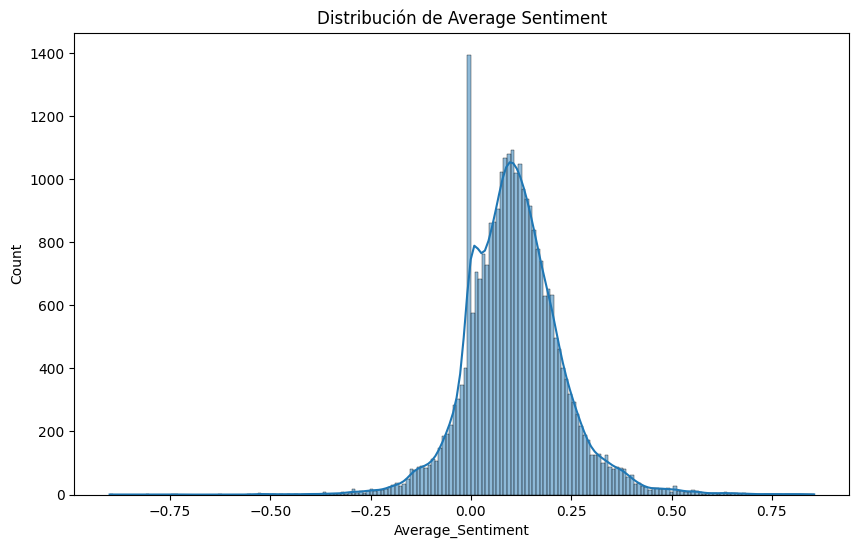

In [23]:
# Visualizar la distribución de Average_Sentiment
plt.figure(figsize=(10, 6))
sns.histplot(final_data['Average_Sentiment'], kde=True)
plt.title('Distribución de Average Sentiment')
plt.show()

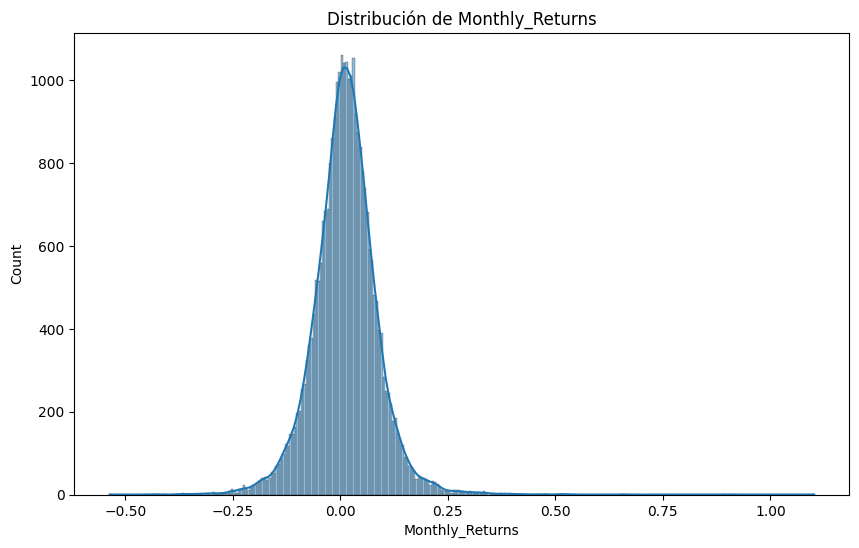

In [24]:
# Visualizar la distribución de Average_Sentiment
plt.figure(figsize=(10, 6))
sns.histplot(final_data['Monthly_Returns'], kde=True)
plt.title('Distribución de Monthly_Returns')
plt.show()

# Importancia Features

In [27]:
final_data_cleaned = final_data.select_dtypes(include=[np.number])

In [28]:
final_data_cleaned.columns

Index(['Monthly_Price', 'Average_Sentiment', 'Monthly_Returns', 'Cluster',
       'Environmental Pillar Score', 'Governance Pillar Score',
       'Social Pillar Score', 'ESG Score', 'ESG Combined Score',
       'ESG Controversies Score', 'HIGH_1', 'LOW_1', 'OPEN_PRC', 'BID', 'ASK',
       'TRNOVR_UNS', 'NUM_MOVES'],
      dtype='object')

In [29]:
final_data_cleaned.isna().sum()

Monthly_Price                 0
Average_Sentiment             0
Monthly_Returns               0
Cluster                       0
Environmental Pillar Score    0
Governance Pillar Score       0
Social Pillar Score           0
ESG Score                     0
ESG Combined Score            0
ESG Controversies Score       0
HIGH_1                        0
LOW_1                         0
OPEN_PRC                      0
BID                           0
ASK                           0
TRNOVR_UNS                    0
NUM_MOVES                     0
dtype: int64

In [30]:
correlation_matrix = final_data_cleaned.corr()

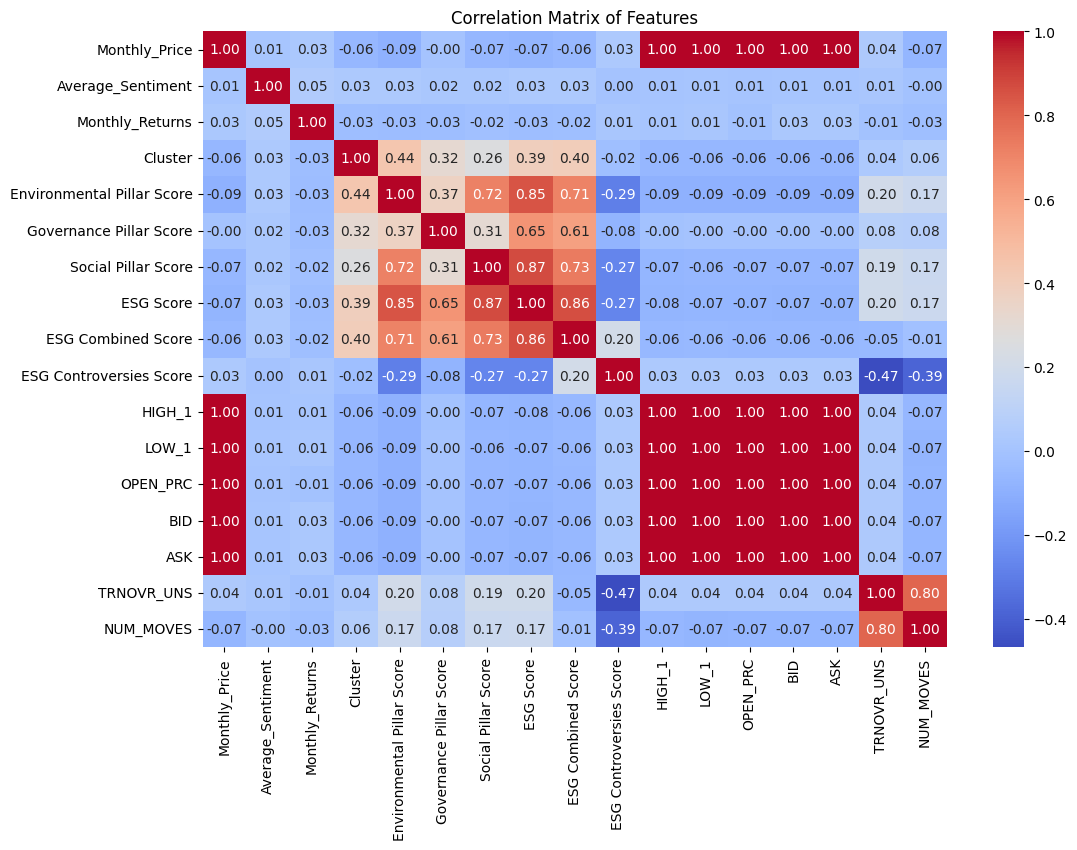

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [30]:
# Identificar características altamente correlacionadas (correlación > 0.85)
threshold = 0.85
high_corr = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix != 1.0)].stack().reset_index()
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr

,Feature 1,Feature 2,Correlation
0,Monthly_Price,HIGH_1,0.998823
1,Monthly_Price,LOW_1,0.998772
2,Monthly_Price,OPEN_PRC,0.997263
3,Monthly_Price,BID,0.999958
4,Monthly_Price,ASK,0.999958
5,Social Pillar Score,ESG Score,0.871128
6,ESG Score,Social Pillar Score,0.871128
7,ESG Score,ESG Combined Score,0.863387
8,ESG Combined Score,ESG Score,0.863387
9,HIGH_1,Monthly_Price,0.998823


In [25]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
# Separar características y objetivo (Monthly_Returns)
X = final_data_cleaned.drop(['Monthly_Returns'], axis=1)
y = final_data_cleaned['Monthly_Returns']

In [181]:
# Entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

In [182]:
# Obtener la importancia de las características
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

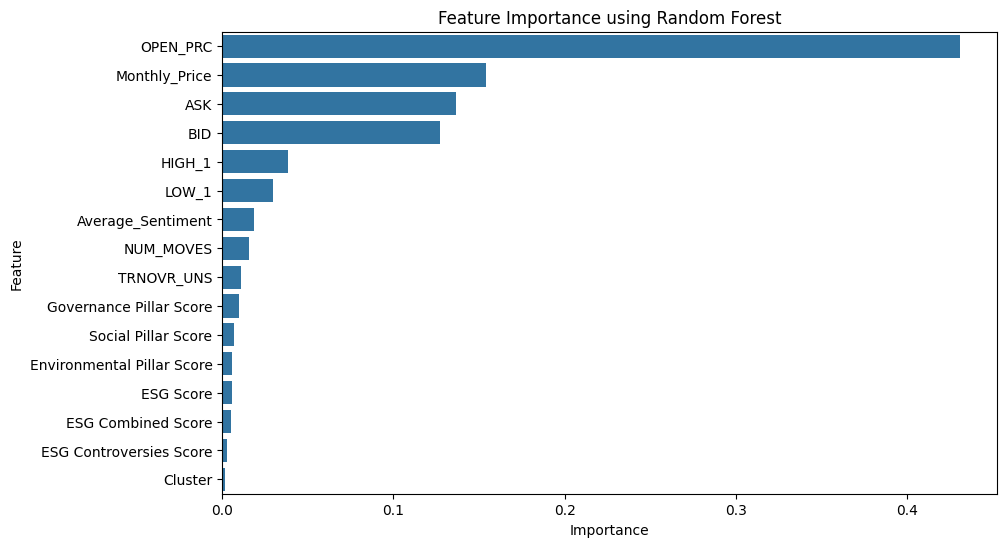

In [183]:
# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance using Random Forest')
plt.show()

In [184]:
feature_importance_df

,Feature,Importance
11,OPEN_PRC,0.430803
0,Monthly_Price,0.154257
13,ASK,0.136297
12,BID,0.126986
9,HIGH_1,0.038607
10,LOW_1,0.029947
1,Average_Sentiment,0.018376
15,NUM_MOVES,0.015712
14,TRNOVR_UNS,0.011151
4,Governance Pillar Score,0.009947


In [185]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [186]:
# Usar RFE con regresión lineal para seleccionar las características más importantes
estimator = LinearRegression()

In [187]:
# Configurar el selector RFE
rfe_selector = RFE(estimator, n_features_to_select=5, step=1)  # Puedes cambiar n_features_to_select según tu criterio
rfe_selector = rfe_selector.fit(X, y)

In [188]:
# Obtener las características seleccionadas
selected_features_rfe = X.columns[rfe_selector.support_]
print("Selected Features using RFE:", selected_features_rfe)

Selected Features using RFE: Index(['Average_Sentiment', 'Cluster', 'OPEN_PRC', 'BID', 'ASK'], dtype='object')


# SHAP

In [33]:
import shap
import xgboost as xgb

/Users/luca/Documents/Polimi/esg-sentiment-prediction/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [190]:
# Entrenar un modelo XGBoost para ilustrar SHAP
model = xgb.XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [191]:
explainer = shap.Explainer(model, X)

In [192]:
shap_values = explainer(X)

 98%|===================| 28279/28849 [00:43<00:00]        

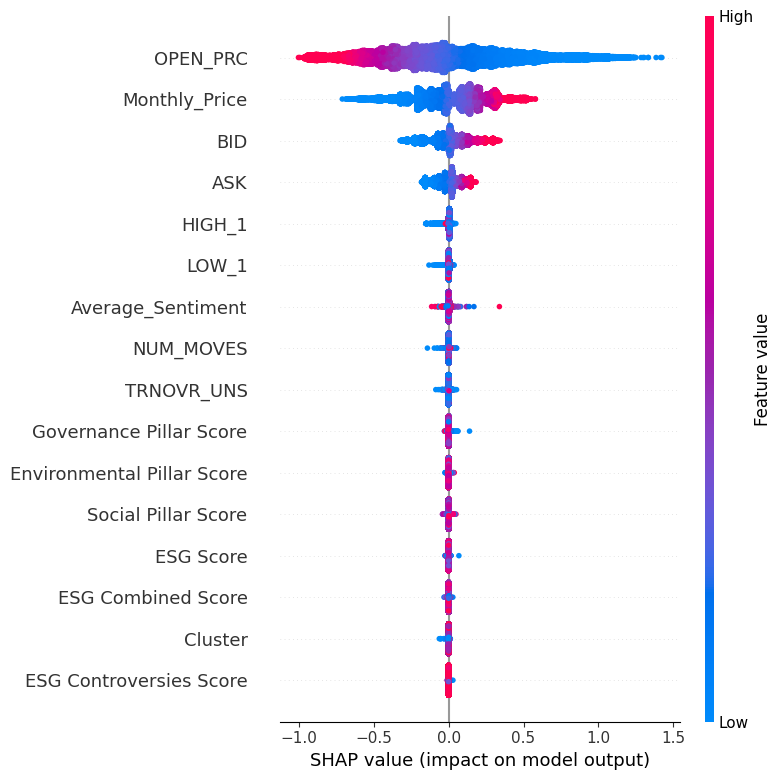

In [193]:
# Resumen gráfico de SHAP para visualizar la importancia de las características
shap.summary_plot(shap_values, X)

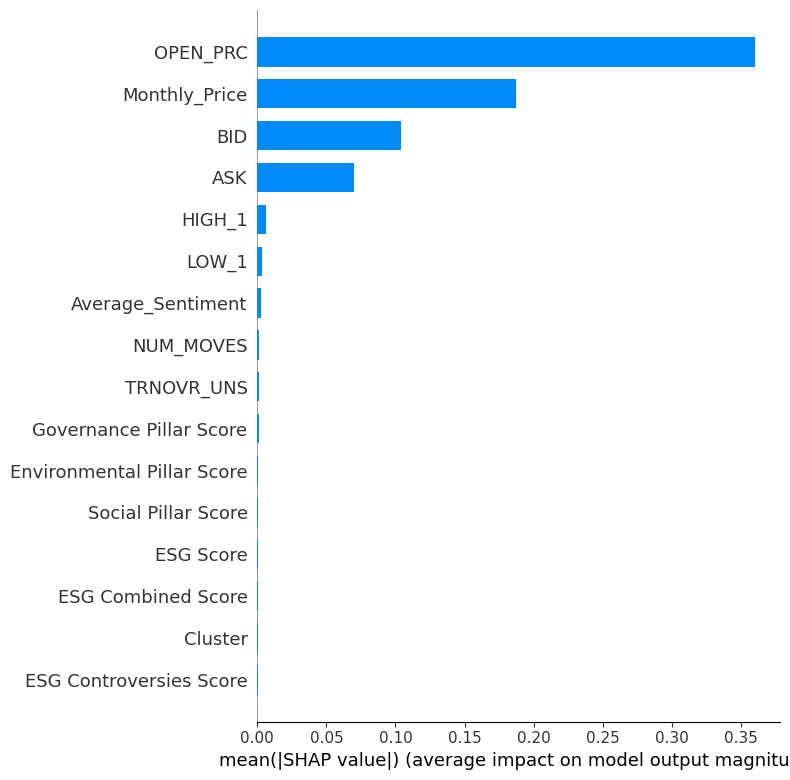

In [194]:
# Si quieres un gráfico de barras con la importancia de cada feature:
shap.summary_plot(shap_values, X, plot_type="bar")

In [34]:
# Entrenar un modelo RandomForest para ilustrar SHAP
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [35]:
# Crear un TreeExplainer para el modelo RandomForest
explainer = shap.TreeExplainer(model)

In [36]:
# Calcular los valores SHAP para todo el dataset (TreeExplainer es más eficiente)
shap_values = explainer.shap_values(X)

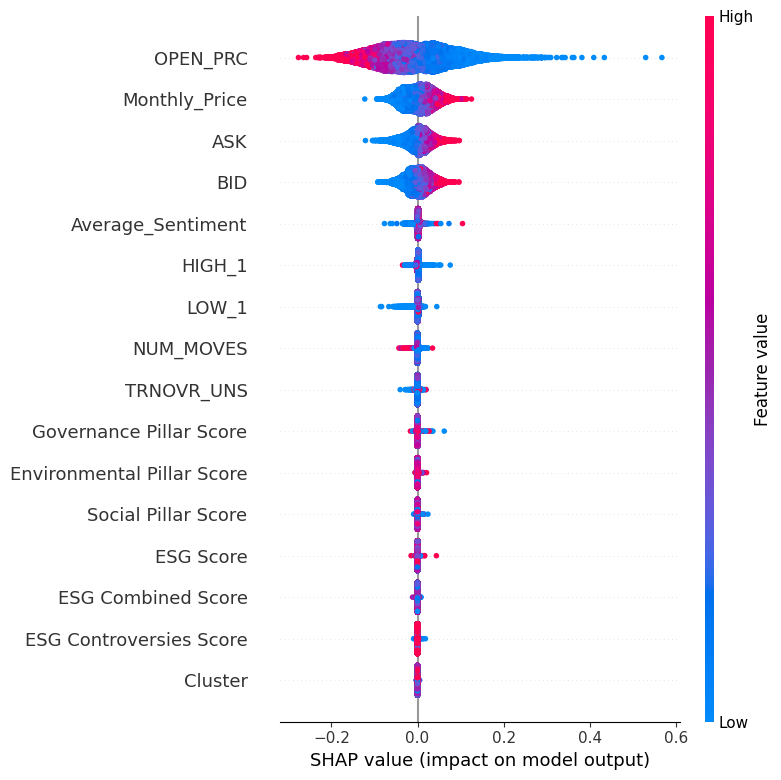

In [37]:
# Resumen gráfico de SHAP para visualizar la importancia de las características
shap.summary_plot(shap_values, X)

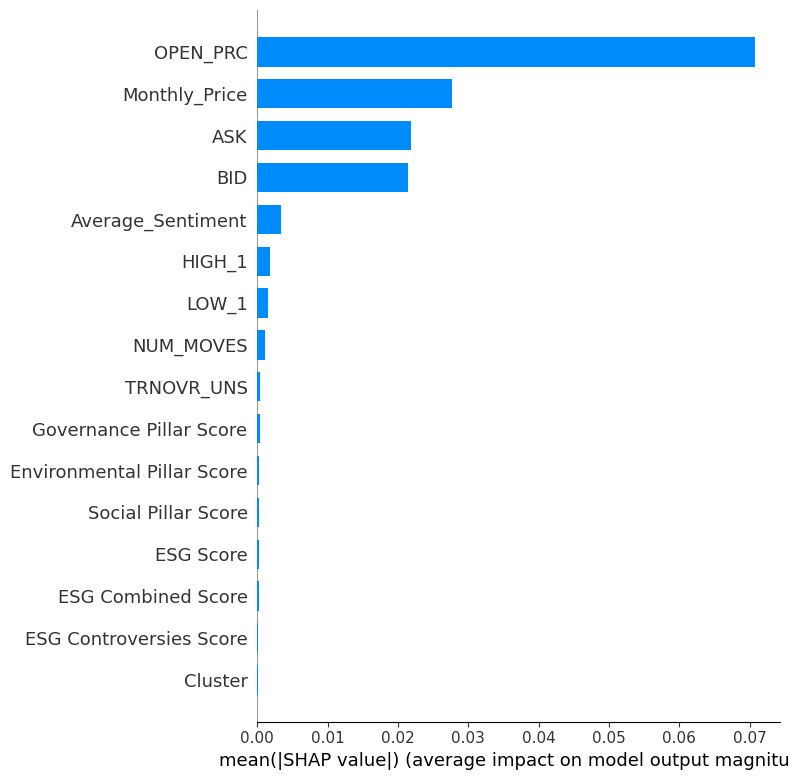

In [38]:
# Si quieres un gráfico de barras con la importancia de cada feature:
shap.summary_plot(shap_values, X, plot_type="bar")

In [42]:
shap_values_df = pd.DataFrame({
    'feature': X.columns,  # X es el conjunto de características de entrada
    'mean_abs_shap': np.mean(np.abs(shap_values), axis=0)  # Importancia media de SHAP
})

In [55]:
# Definir un umbral, por ejemplo 0.01
threshold = 0.003

# Filtrar características cuyo valor SHAP medio sea mayor que el umbral
relevant_features = shap_values_df[shap_values_df['mean_abs_shap'] > threshold]['feature']

In [57]:
X_reduced = X[relevant_features]

In [37]:
# Eliminar manualmente características menos relevantes
X_reduced = X.drop(['NUM_MOVES', 'TRNOVR_UNS', 'Cluster', 'ESG Controversies Score', 
                    'Social Pillar Score', 'Environmental Pillar Score', 'Governance Pillar Score', 'ESG Score', 'ESG Combined Score', 'HIGH_1', 'LOW_1'], axis=1)

In [38]:
X_reduced

,Monthly_Price,Average_Sentiment,OPEN_PRC,BID,ASK
0,37.77,0.081075,41.18,37.75,37.77
1,42.21,0.132044,37.90,42.20,42.21
2,41.55,0.000429,42.34,41.54,41.55
3,41.37,0.124904,41.46,41.36,41.37
4,41.19,0.011356,41.38,41.19,41.20
...,...,...,...,...,...
28844,126.42,0.073671,114.90,126.35,126.38
28845,124.59,0.231763,126.13,124.55,124.58
28846,127.92,0.165417,124.99,127.90,127.92
28847,120.52,0.176480,128.78,120.44,120.45


In [39]:
# Reentrenar el modelo con el conjunto reducido de características
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [40]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [60]:
# Entrenar el modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
# Predecir los valores en los conjuntos de entrenamiento y prueba
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
# Evaluación del rendimiento (MSE y R²) para Random Forest
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

In [63]:
print(f"Random Forest - Rendimiento en entrenamiento (MSE): {train_mse_rf}")
print(f"Random Forest - Rendimiento en prueba (MSE): {test_mse_rf}")
print(f"Random Forest - Rendimiento en entrenamiento (R²): {train_r2_rf}")
print(f"Random Forest - Rendimiento en prueba (R²): {test_r2_rf}")

Random Forest - Rendimiento en entrenamiento (MSE): 9.0283985693831e-05
Random Forest - Rendimiento en prueba (MSE): 0.000663514644868444
Random Forest - Rendimiento en entrenamiento (R²): 0.9840551222871019
Random Forest - Rendimiento en prueba (R²): 0.8794931727507846


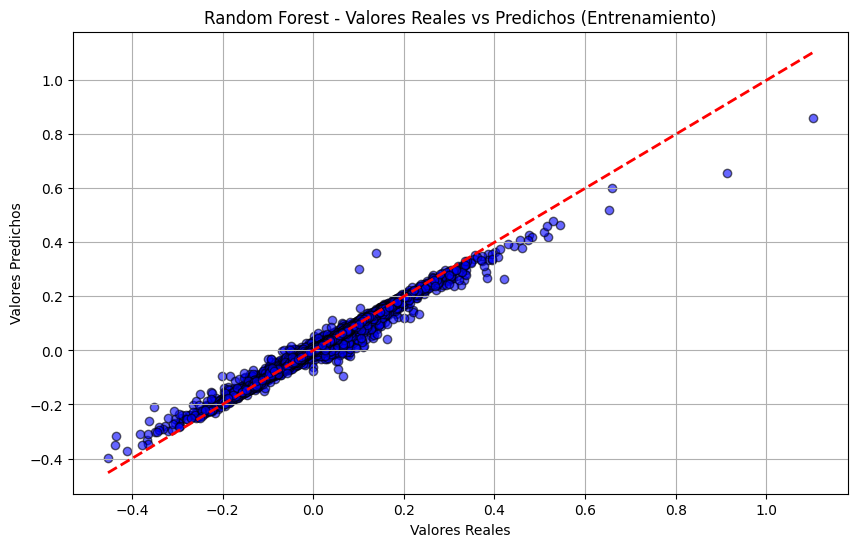

In [64]:
# Gráfico de Valores Reales vs Predichos (Entrenamiento)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_rf, color="blue", edgecolor="k", alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color="red", lw=2, ls='--')
plt.title("Random Forest - Valores Reales vs Predichos (Entrenamiento)")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.grid(True)
plt.show()

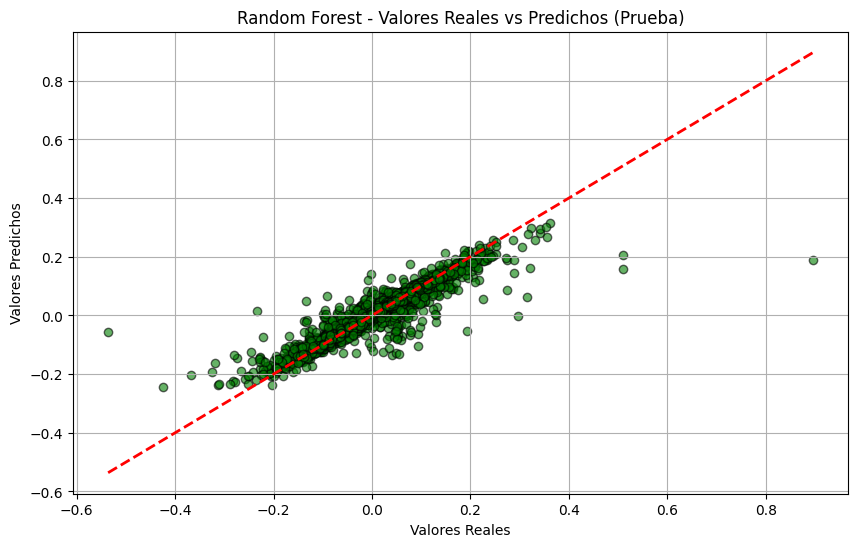

In [65]:
# Gráfico de Valores Reales vs Predichos (Prueba)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_rf, color="green", edgecolor="k", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2, ls='--')
plt.title("Random Forest - Valores Reales vs Predichos (Prueba)")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.grid(True)
plt.show()

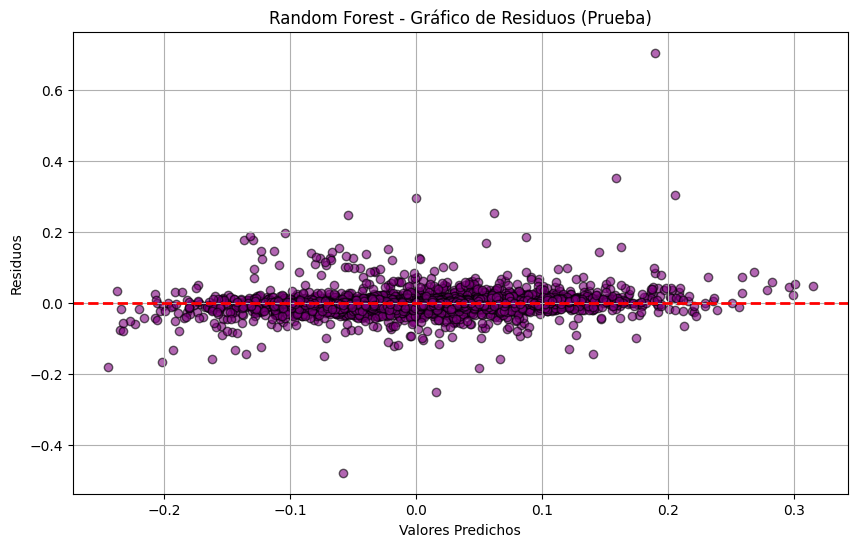

In [66]:
# Gráfico de Residuos para Random Forest (Prueba)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_rf, y_test - y_test_pred_rf, color="purple", edgecolor="k", alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Random Forest - Gráfico de Residuos (Prueba)")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.grid(True)
plt.show()

# Multivariable Regression

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
regression_model = LinearRegression()

In [52]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [53]:
y_train_pred = regression_model.predict(X_train)
y_test_pred = regression_model.predict(X_test)

In [54]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [55]:
print(f"Rendimiento en entrenamiento (MSE): {train_mse}")
print(f"Rendimiento en prueba (MSE): {test_mse}")
print(f"Rendimiento en entrenamiento (R²): {train_r2}")
print(f"Rendimiento en prueba (R²): {test_r2}")

Rendimiento en entrenamiento (MSE): 0.0041370916922962644
Rendimiento en prueba (MSE): 0.007688082915817637
Rendimiento en entrenamiento (R²): 0.269356346933875
Rendimiento en prueba (R²): -0.3963014787680701


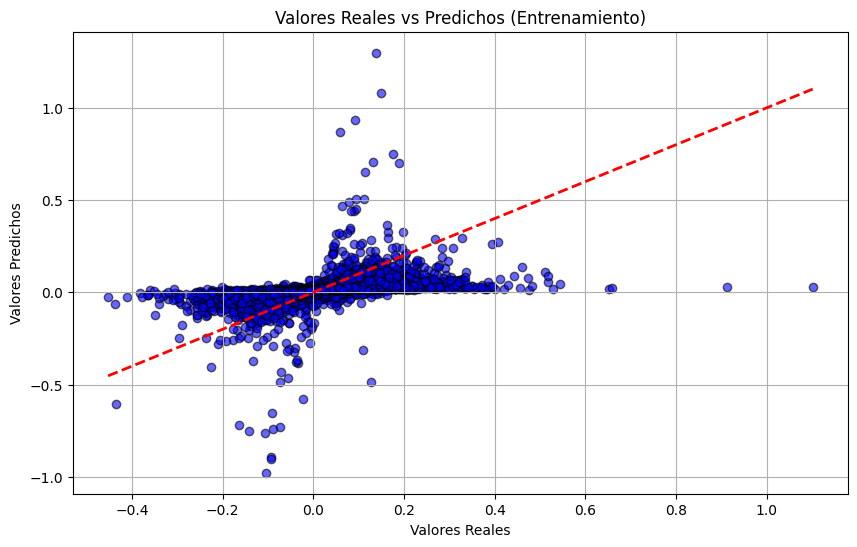

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color="blue", edgecolor="k", alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color="red", lw=2, ls='--')
plt.title("Valores Reales vs Predichos (Entrenamiento)")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.grid(True)
plt.show()


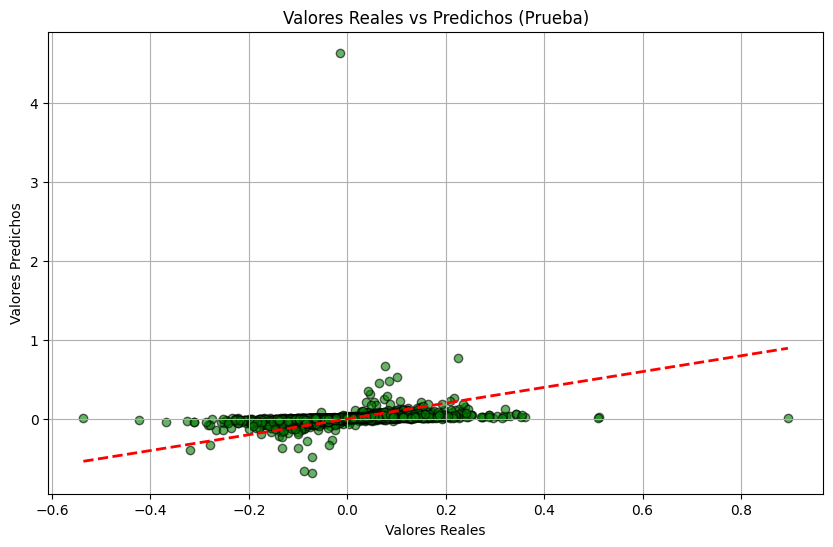

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color="green", edgecolor="k", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2, ls='--')
plt.title("Valores Reales vs Predichos (Prueba)")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.grid(True)
plt.show()

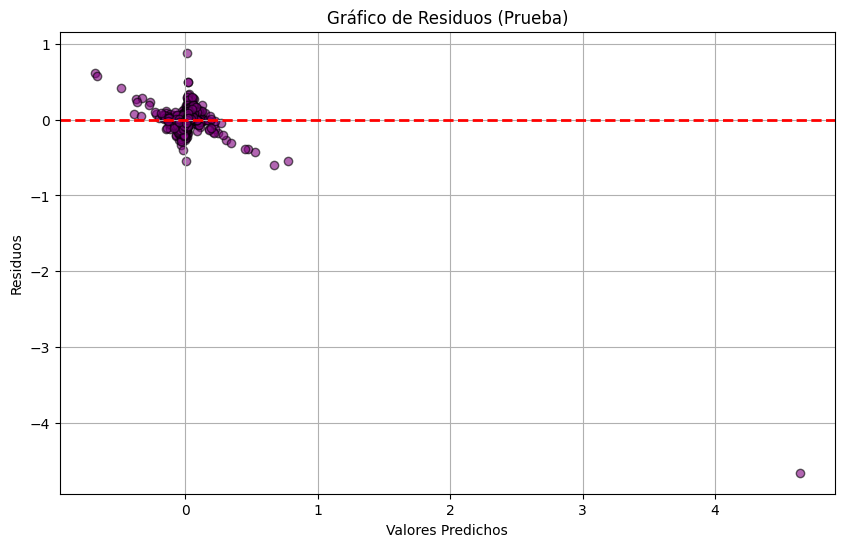

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, y_test - y_test_pred, color="purple", edgecolor="k", alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Gráfico de Residuos (Prueba)")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.grid(True)
plt.show()

# MLP

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [69]:
class DeepMLP(nn.Module):
    def __init__(self, input_size):
        super(DeepMLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

In [70]:
input_size = X_train.shape[1]
mlp_model = DeepMLP(input_size)

In [73]:
# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

In [74]:
# Training MLP
epochs = 100
batch_size = 32

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

mlp_model.train()
for epoch in range(epochs):
    permutation = torch.randperm(X_train_tensor.size()[0])
    
    for i in range(0, X_train_tensor.size()[0], batch_size):
        optimizer.zero_grad()
        
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]
        
        # Forward pass
        outputs = mlp_model(batch_x)
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.0001
Epoch [20/100], Loss: 0.0039
Epoch [30/100], Loss: 0.0028
Epoch [40/100], Loss: 0.0021
Epoch [50/100], Loss: 0.0119
Epoch [60/100], Loss: 0.0007
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0083
Epoch [90/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0016


In [75]:
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

In [76]:
mlp_model.eval()

DeepMLP(
  (network): Sequential(
    (0): Linear(in_features=5, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [77]:
with torch.no_grad():
    y_train_pred_mlp = mlp_model(X_train_tensor).numpy().flatten()
    y_test_pred_mlp = mlp_model(X_test_tensor).numpy().flatten()

In [78]:
train_mse_mlp = mean_squared_error(y_train, y_train_pred_mlp)
test_mse_mlp = mean_squared_error(y_test, y_test_pred_mlp)
train_r2_mlp = r2_score(y_train, y_train_pred_mlp)
test_r2_mlp = r2_score(y_test, y_test_pred_mlp)

In [79]:
print(f"MLP - Rendimiento en entrenamiento (MSE): {train_mse_mlp}")
print(f"MLP - Rendimiento en prueba (MSE): {test_mse_mlp}")
print(f"MLP - Rendimiento en entrenamiento (R²): {train_r2_mlp}")
print(f"MLP - Rendimiento en prueba (R²): {test_r2_mlp}")

MLP - Rendimiento en entrenamiento (MSE): 0.00048706013100482774
MLP - Rendimiento en prueba (MSE): 0.0004385657279019534
MLP - Rendimiento en entrenamiento (R²): 0.9139812651378024
MLP - Rendimiento en prueba (R²): 0.9203481568667022


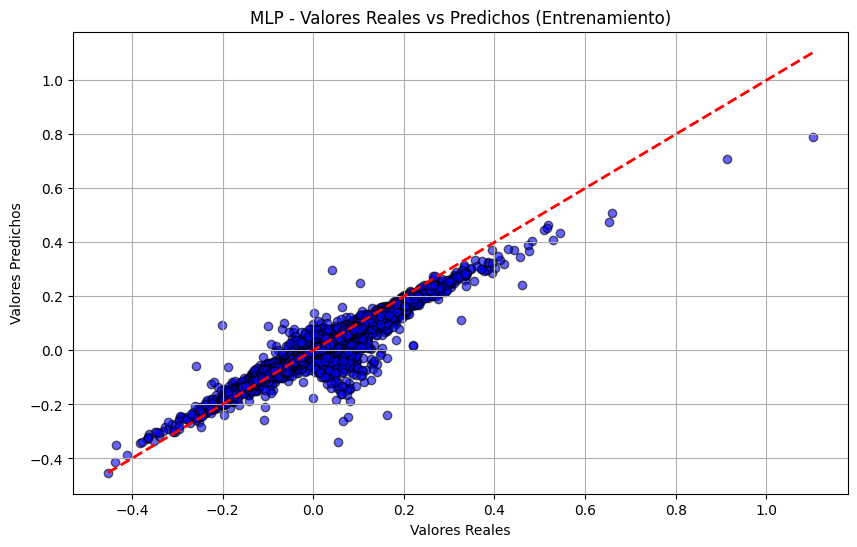

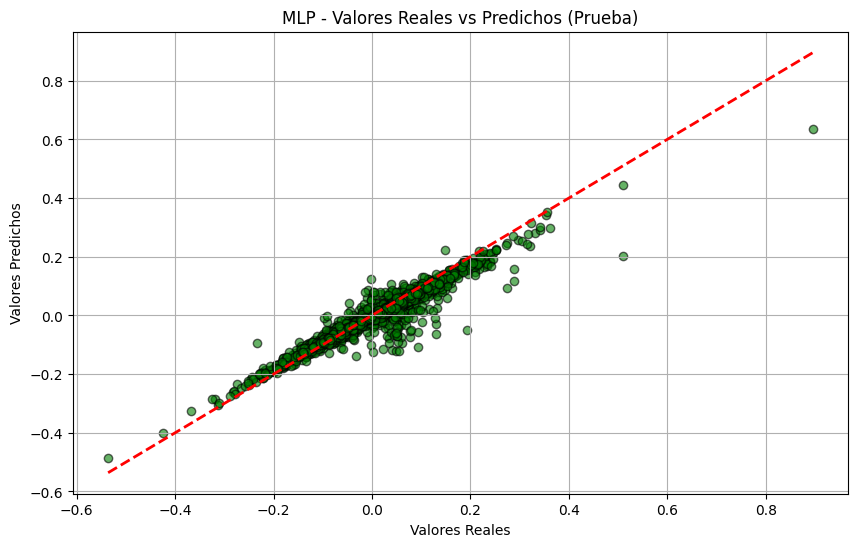

In [80]:
# Gráfico de Valores Reales vs Predichos (Entrenamiento)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_mlp, color="blue", edgecolor="k", alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color="red", lw=2, ls='--')
plt.title("MLP - Valores Reales vs Predichos (Entrenamiento)")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.grid(True)
plt.show()

# Gráfico de Valores Reales vs Predichos (Prueba)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_mlp, color="green", edgecolor="k", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2, ls='--')
plt.title("MLP - Valores Reales vs Predichos (Prueba)")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.grid(True)
plt.show()

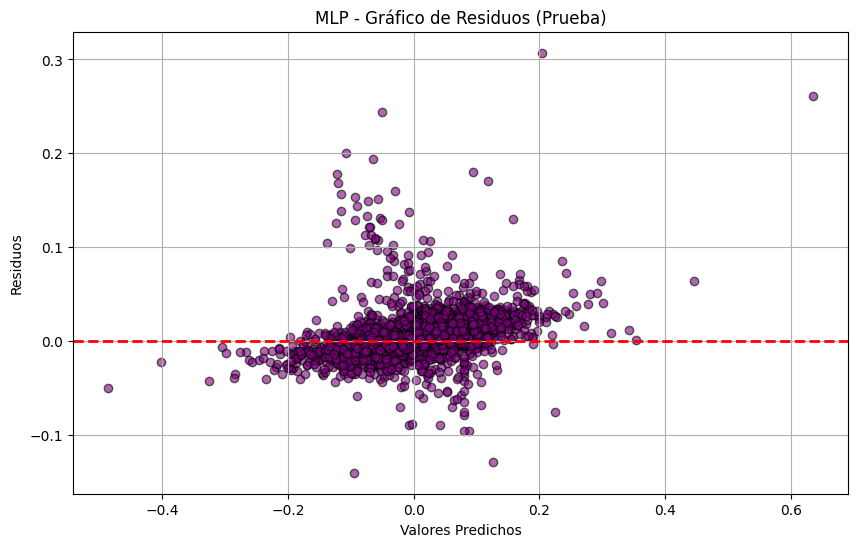

In [81]:
# Gráfico de Residuos (Prueba)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_mlp, y_test - y_test_pred_mlp, color="purple", edgecolor="k", alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("MLP - Gráfico de Residuos (Prueba)")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.grid(True)
plt.show()

# Comparison

In [82]:
# Resultados de MSE y R² para cada modelo (pon los valores reales que obtuviste en las variables)
mse_train_values = [train_mse_rf, train_mse_mlp, train_mse]
mse_test_values = [test_mse_rf, test_mse_mlp, test_mse]
r2_train_values = [train_r2_rf, train_r2_mlp, train_r2]
r2_test_values = [test_r2_rf, test_r2_mlp, test_r2]

In [83]:
model_names = ['Random Forest', 'MLP', 'Linear Regression']

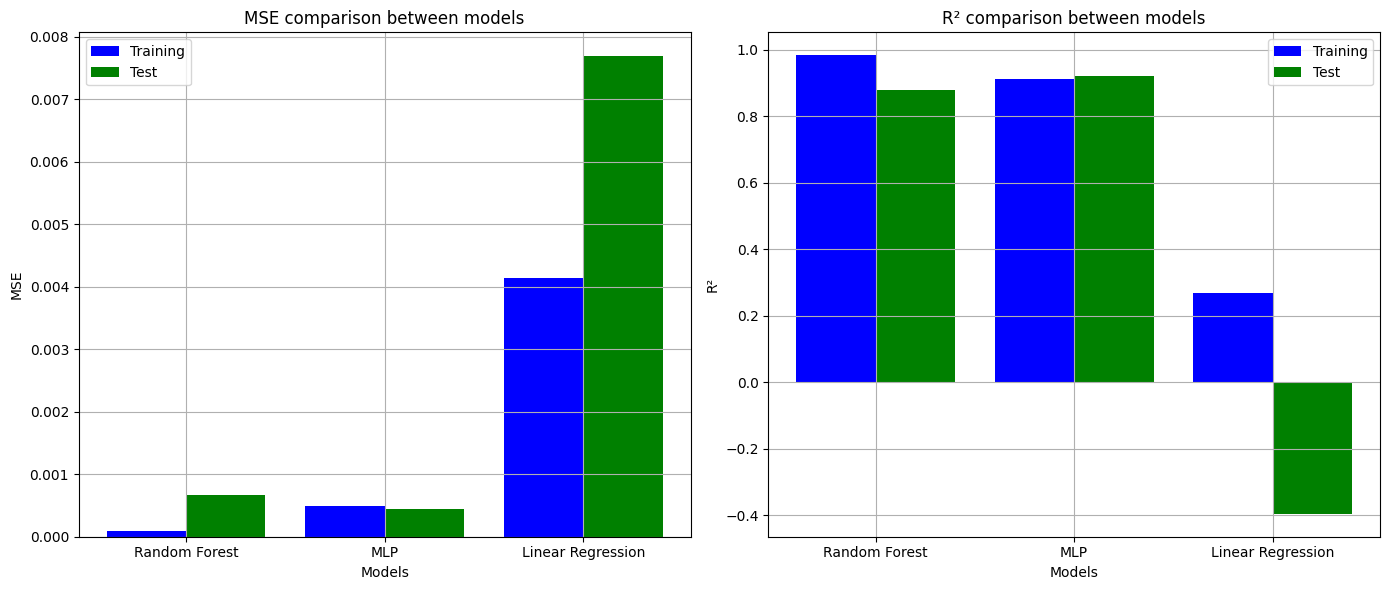

In [85]:
# Gráfico de barras para MSE
plt.figure(figsize=(14, 6))
x = np.arange(len(model_names))  # posición para las barras

plt.subplot(1, 2, 1)
plt.bar(x - 0.2, mse_train_values, 0.4, label='Training', color='blue')
plt.bar(x + 0.2, mse_test_values, 0.4, label='Test', color='green')
plt.xticks(x, model_names)
plt.title('MSE comparison between models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

# Gráfico de barras para R²
plt.subplot(1, 2, 2)
plt.bar(x - 0.2, r2_train_values, 0.4, label='Training', color='blue')
plt.bar(x + 0.2, r2_test_values, 0.4, label='Test', color='green')
plt.xticks(x, model_names)
plt.title('R² comparison between models')
plt.xlabel('Models')
plt.ylabel('R²')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [86]:
# Valores reales vs predichos (coloca aquí las predicciones de cada modelo)
y_test_pred_rf = rf_model.predict(X_test)  # Predicciones de Random Forest
y_test_pred_mlp = mlp_model(X_test_tensor).detach().numpy().flatten()  # Predicciones de MLP
y_test_pred_lr = regression_model.predict(X_test)  # Predicciones de Regresión Lineal

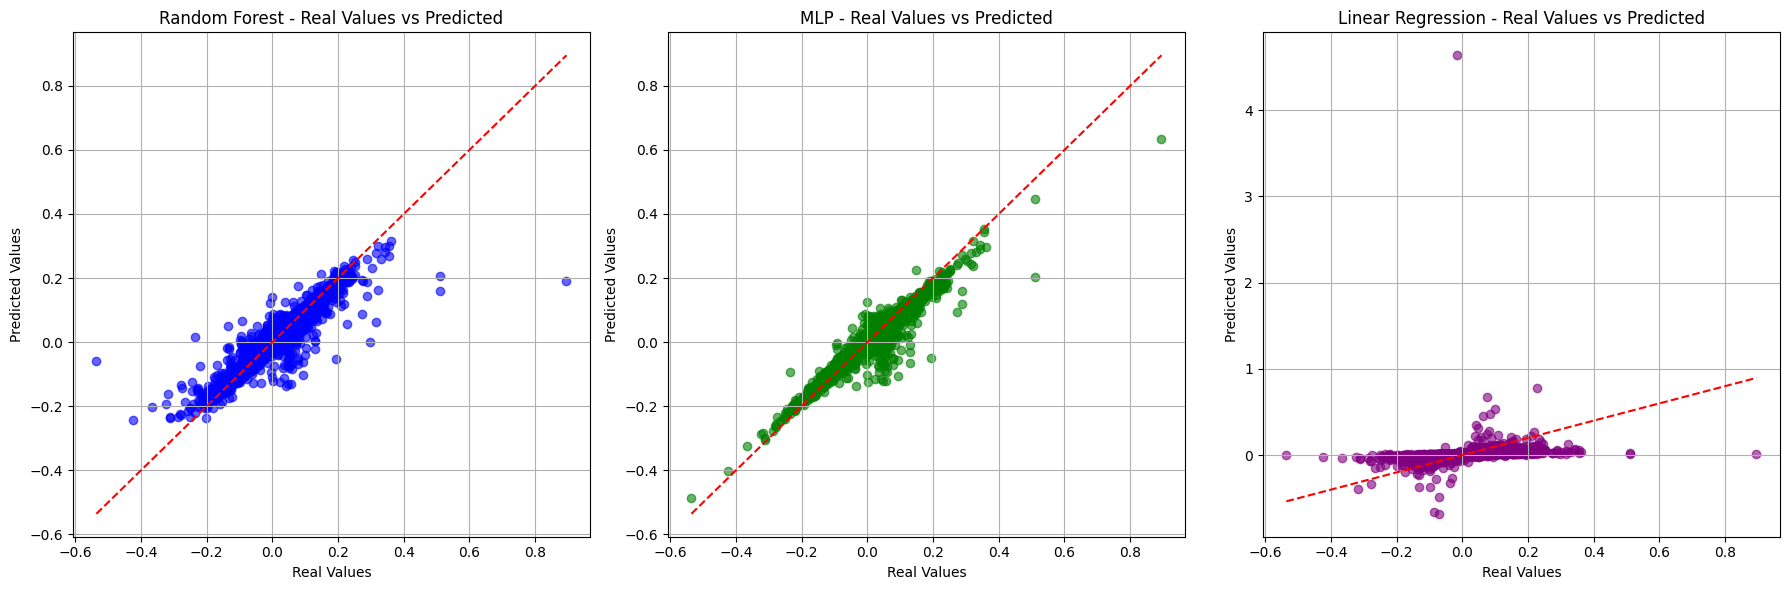

In [88]:
plt.figure(figsize=(18, 6))

# Random Forest
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_test_pred_rf, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Random Forest - Real Values vs Predicted')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# MLP
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_test_pred_mlp, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('MLP - Real Values vs Predicted')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Linear Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_test_pred_lr, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Linear Regression - Real Values vs Predicted')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.tight_layout()
plt.show()

In [90]:
torch.save(mlp_model.state_dict(), 'mlp_model.pth')